<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0114_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

실전! 데이터 실습 (6)
===

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

os.chdir('/content/drive/MyDrive/새싹2기/데이터분석/data/')

In [ ]:
tips = pd.read_csv('tips.csv')

## [1] 데이터 합치기 (concat, merge)

### (1) tips 데이터프레임에서 목요일(Thur)과 금요일(Fri) 데이터만 각각 추출하여, tips_thur, tips_fri 의 데이터 프레임을 만드세요.

In [ ]:
tips['day'] == 'Thur'

,day
0,False
1,False
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


In [ ]:
tips_thur = tips[tips['day'] == 'Thur'].copy()

In [ ]:
tips_fri = tips[tips['day'] == 'Fri'].copy()

In [ ]:
tips_thur.shape

(62, 7)

In [ ]:
tips_fri.shape

(19, 7)

### (2) tips_thur와 tips_fri를 행을 기준으로 합치고 tips_concat 로 만드세요.

In [ ]:
tips_concat = pd.concat([tips_thur, tips_fri])
tips_concat.head()

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2


In [ ]:
tips_concat['day'].value_counts()

,count
day,
Thur,62
Fri,19


### (3) tips 데이터프레임와 요일 정보 테이블을 merge 해 보세요.

-> 데이터 병합

`pd.merge(left,right, on='key',how='inner')`

In [ ]:
# 요일 정보 테이블 생성
df_day = pd.DataFrame({
    'day': ['Thur', 'Fri', 'Sat', 'Sun'],
    'promotion': ['No', 'Yes', 'Yes', 'No']
})
df_day

,day,promotion
0,Thur,No
1,Fri,Yes
2,Sat,Yes
3,Sun,No


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips_promo = pd.merge(tips,df_day,on='day',how='left')
tips_promo.head()

,total_bill,tip,sex,smoker,day,time,size,promotion
0,16.99,1.01,Female,No,Sun,Dinner,2,No
1,10.34,1.66,Male,No,Sun,Dinner,3,No
2,21.01,3.50,Male,No,Sun,Dinner,3,No
3,23.68,3.31,Male,No,Sun,Dinner,2,No
4,24.59,3.61,Female,No,Sun,Dinner,4,No


In [ ]:
tips_promo['promotion'].value_counts()

,count
promotion,
No,138
Yes,106


In [ ]:
tips_promo['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


### (4) tips와 요일·시간대별 promotion 정보를 merge해서 tips_with_promo_time 데이터 프레임을 만드세요.


In [ ]:
# 요일과 시간대별로 프로모션 정보를 다르게 부여
df_day_time = pd.DataFrame({
    'day': ['Thur', 'Thur', 'Fri', 'Fri', 'Sat', 'Sat', 'Sun', 'Sun'],
    'time': ['Lunch', 'Dinner', 'Lunch', 'Dinner', 'Lunch', 'Dinner', 'Lunch', 'Dinner'],
    'promotion': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
})

In [ ]:
df_day_time

,day,time,promotion
0,Thur,Lunch,No
1,Thur,Dinner,Yes
2,Fri,Lunch,Yes
3,Fri,Dinner,No
4,Sat,Lunch,No
5,Sat,Dinner,Yes
6,Sun,Lunch,Yes
7,Sun,Dinner,No


In [ ]:
tips_with_promo_time = tips.merge(df_day_time, on=['day','time'],how='left')
tips_with_promo_time

,total_bill,tip,sex,smoker,day,time,size,promotion
0,16.99,1.01,Female,No,Sun,Dinner,2,No
1,10.34,1.66,Male,No,Sun,Dinner,3,No
2,21.01,3.50,Male,No,Sun,Dinner,3,No
3,23.68,3.31,Male,No,Sun,Dinner,2,No
4,24.59,3.61,Female,No,Sun,Dinner,4,No
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Yes
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Yes
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Yes
242,17.82,1.75,Male,No,Sat,Dinner,2,Yes


<Axes: ylabel='promotion'>

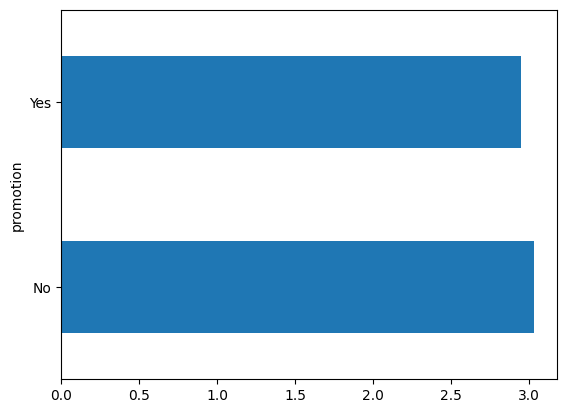

In [ ]:
tips_with_promo_time.groupby('promotion')['tip'].mean().plot.barh()

In [ ]:
tips_with_promo_time.groupby(['promotion','sex'])['tip'].mean().reset_index()

,promotion,sex,tip
0,No,Female,2.853333
1,No,Male,3.130737
2,Yes,Female,2.800909
3,Yes,Male,3.026613


## [2] 데이터 재구조화 (reshape)

### (1) 요일(day)을 행으로, 시간(time)을 컬럼으로 하고, 값으로는 팁(tip)의 평균을 사용하여 데이터를 재구조화하세요.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.pivot_table(index='day',
                 columns='time',
                 values='tip',
                 aggfunc='mean',
                 fill_value=0)

time,Dinner,Lunch
day,,
Fri,2.940000,2.382857
Sat,2.993103,0.000000
Sun,3.255132,0.000000
Thur,3.000000,2.767705


In [ ]:
# (질문) 각 파라미터에 올 수 있는 컬럼의 특징
# index : 행의 갯수가 딱 정해져 있을 만한
# columns : 열의 갯수가 딱 정해져 있을 만한
# values : 평균 등의 계산을 취할 수 있는 값

# 안 좋은 예시
tips.pivot_table(index='tip',
                 columns='total_bill',
                 values='size',
                 aggfunc='mean', # 기본 : 평균
                 fill_value=0)

total_bill,3.07,5.75,7.25,7.51,7.56,7.74,8.35,8.51,8.52,8.58,...,40.17,40.55,41.19,43.11,44.30,45.35,48.17,48.27,48.33,50.81
tip,,,,,,,,,,,,,,,,,,,,,
1.00,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
7.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (2) time, day을 식별열로, total_bill, tip, size를 값으로 하는 데이터 셋을 생성해 보세요.


In [ ]:
tips_melt = tips.melt(id_vars=['day','time'],
                      value_vars=['total_bill','tip','size']
                      )
tips_melt

,day,time,variable,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
...,...,...,...,...
727,Sat,Dinner,size,3.00
728,Sat,Dinner,size,2.00
729,Sat,Dinner,size,2.00
730,Sat,Dinner,size,2.00


In [ ]:
tips_melt.dtypes

,0
day,object
time,object
variable,object
value,float64


In [ ]:
tips_melt_wrong = tips.melt(id_vars=['day','time'])
tips_melt_wrong

,day,time,variable,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
...,...,...,...,...
1215,Sat,Dinner,size,3
1216,Sat,Dinner,size,2
1217,Sat,Dinner,size,2
1218,Sat,Dinner,size,2


In [ ]:
tips_melt_wrong['variable'].value_counts()

,count
variable,
total_bill,244
tip,244
sex,244
smoker,244
size,244


In [ ]:
tips_melt_wrong.dtypes

,0
day,object
time,object
variable,object
value,object


### (3) pivot_table을 사용하여 흡연자와 비흡연자의 요일별, 시간대별 평균 팁 금액 계산해 보세요.

In [ ]:
tips.pivot_table(index=['day','time'],columns='smoker',
                 values='tip',aggfunc='mean')

smoker             No       Yes
day  time                      
Fri  Dinner  2.750000  3.003333
     Lunch   3.000000  2.280000
Sat  Dinner  3.102889  2.875476
Sun  Dinner  3.167895  3.516842
Thur Dinner  3.000000       NaN
     Lunch   2.666364  3.030000

In [ ]:
tips.groupby(['day','time','smoker'])['tip'].mean().unstack()

smoker             No       Yes
day  time                      
Fri  Dinner  2.750000  3.003333
     Lunch   3.000000  2.280000
Sat  Dinner  3.102889  2.875476
Sun  Dinner  3.167895  3.516842
Thur Dinner  3.000000       NaN
     Lunch   2.666364  3.030000

### (4) 성별 별, 요일 별 평균 팁 금액 계산해 보세요. 이때, 최종결과를 인간이 보기 쉬운 데이터 형식으로 바꾸어서 확인해 보세요.

In [ ]:
tips.groupby(['sex','day'])['tip'].mean()

sex     day 
Female  Fri     2.781111
        Sat     2.801786
        Sun     3.367222
        Thur    2.575625
Male    Fri     2.693000
        Sat     3.083898
        Sun     3.220345
        Thur    2.980333
Name: tip, dtype: float64

In [ ]:
# long(Multiindex 형태에서) -> wide
tips.groupby(['sex','day'])['tip'].mean().unstack()

day,Fri,Sat,Sun,Thur
sex,,,,
Female,2.781111,2.801786,3.367222,2.575625
Male,2.693000,3.083898,3.220345,2.980333
